In [2]:
import pandas as pd

In [3]:
from statsmodels.tsa.stattools import adfuller

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [5]:
import statsmodels.api as sm

In [6]:
import statsmodels.api as sm

In [7]:
import pmdarima

In [8]:
from pmdarima.arima import auto_arima

In [9]:
from matplotlib import pyplot as plt

In [21]:
df=pd.read_csv(r'C:\Users\ZarasAndreas\Documents\Documents\Courses Taught by Me\Forecasting Course_FINAL\FINAL\Course Presentations\Python\saledata - Python.csv')

In [22]:
df

,Date,PrintMedia,TVRadio,DirectMail,Internet,Staffing,CompeteSales,LSalesRatio,SalesAmount,SalesRatio,TotalAdvertising
0,28Sep1997,250,1520,120,352,15,82539,0.661932,60015,0.579002,2242
1,05Oct1997,210,1480,210,254,15,80219,0.579002,47884,0.626207,2154
2,12Oct1997,190,1380,414,246,16,84681,0.626207,46798,0.644065,2230
3,19Oct1997,180,1322,530,286,19,88307,0.644065,56831,0.608435,2318
4,26Oct1997,180,1250,530,270,18,81248,0.608435,68287,0.543338,2230
...,...,...,...,...,...,...,...,...,...,...,...
83,02May1999,20,0,45,350,117,98223,0.646234,52256,0.652736,415
84,09May1999,16,0,15,440,120,97874,0.652736,60680,0.617291,471
85,16May1999,16,182,15,453,121,106750,0.617291,62286,0.631522,666
86,23May1999,16,602,0,507,120,103959,0.631522,66803,0.608795,1125


In [23]:
df=df.set_index("Date")

<AxesSubplot:xlabel='Date'>

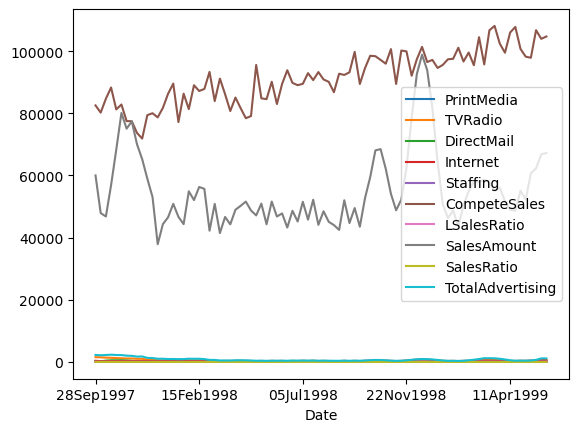

In [24]:
df.plot()

In [14]:
pmdarima.arima.nsdiffs(df['SalesAmount'],m=4)

0

In [15]:
pmdarima.arima.nsdiffs(df['SalesAmount'],m=12)

0

In [16]:
adfuller(df["SalesAmount"])

(-2.836222981144326,
 0.0532829586616027,
 4,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 1504.9960584473026)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 28Sep1997 to 30May1999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PrintMedia        88 non-null     int64  
 1   TVRadio           88 non-null     int64  
 2   DirectMail        88 non-null     int64  
 3   Internet          88 non-null     int64  
 4   Staffing          88 non-null     int64  
 5   CompeteSales      88 non-null     int64  
 6   LSalesRatio       88 non-null     float64
 7   SalesAmount       88 non-null     int64  
 8   SalesRatio        88 non-null     float64
 9   TotalAdvertising  88 non-null     int64  
dtypes: float64(2), int64(8)
memory usage: 7.6+ KB


In [26]:
df.columns

Index(['PrintMedia', 'TVRadio', 'DirectMail', 'Internet', 'Staffing',
       'CompeteSales', 'LSalesRatio', 'SalesAmount', 'SalesRatio',
       'TotalAdvertising'],
      dtype='object')

In [56]:
auto_model = auto_arima(df[['SalesAmount']],exog=df[['TVRadio']],start_q=0,start_p=0,start_P=0,start_Q=0,information_criterion='aic')
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   88
Model:               SARIMAX(5, 0, 0)   Log Likelihood                -882.299
Date:                Sat, 11 Feb 2023   AIC                           1778.599
Time:                        22:55:42   BIC                           1795.940
Sample:                    09-28-1997   HQIC                          1785.585
                         - 05-30-1999                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.034e+04   4262.510      2.426      0.015    1987.437    1.87e+04
ar.L1          1.0086      0.091     11.052      0.000       0.830       1.188
ar.L2          0.2945      0.156      1.887      0.059      -0.011       0.600
ar.L3         -0.7240      0.146     -4.959      0.000      -1.010      -0.438
ar.L4          0.0378      0.147      0.258      0.797      -0.250       0.325
ar.L5          0.1991      0.088      2.269      0.023       0.027       0.371
sigma2      2.706e+07      0.774    3.5e+07      0.000    2.71e+07    2.71e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 0.13
Prob(Q):                              0.79   Prob(JB):                         0.94
Heteroskedasticity (H):               0.53   Skew:                            -0.06
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.7e+23. Standard errors may be unstable.
"""